<a href="https://colab.research.google.com/github/E-Fung/Classification_PCD/blob/main/Copy_of_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INITIALIZE LIBRARIES AND FINAL FILE NAMES**

In [1]:
#########################################################################################################################################################################
#   Initialize libraries and such
#########################################################################################################################################################################

%tensorflow_version 2.x  # this line is not required unless you are in a notebook
from __future__ import absolute_import, division, print_function, unicode_literals
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import math

# Print versions
!python --versions
print('Numpy ' + np.__version__)
print('TensorFlow ' + tf.__version__)
print('Keras ' + tf.keras.__version__)

tflite_model_name = 'PCD_Model'
c_model_name = 'PCD_Model'

#########################################################################################################################################################################

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
unknown option --versions
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
Numpy 1.19.5
TensorFlow 2.4.1
Keras 2.4.0


# **UPLOADING**

In [16]:
#########################################################################################################################################################################
#   Uploading Files
#########################################################################################################################################################################

file_name = 'person_b_1'
uploaded = files.upload()
pd.read_csv(io.StringIO(uploaded[file_name+'.csv'].decode('utf-8')))

#########################################################################################################################################################################

Saving person_b_1.csv to person_b_1.csv


,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,Class
0,7.51,2.26,28.41,1.94,27.88,6.00,-22.10,0.78,-30.62,-48.37,-22.61,4.15,0
1,7.50,2.28,28.39,1.91,27.89,5.99,-22.15,0.76,-30.60,-48.36,-22.62,4.15,0
2,7.48,2.29,28.36,1.91,27.89,5.98,-22.18,0.76,-30.57,-48.36,-22.63,4.15,0
3,7.47,2.29,28.32,1.91,27.89,5.98,-22.21,0.77,-30.56,-48.36,-22.62,4.14,0
4,7.48,2.29,28.28,1.91,27.89,5.99,-22.23,0.75,-30.56,-48.36,-22.60,4.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16515,142.88,-5.14,30.28,-7.47,29.45,8.88,104.87,2.64,-31.93,-112.28,-27.32,-5.44,3
16516,142.65,-4.81,30.02,-7.39,29.25,8.50,104.85,2.34,-31.65,-112.39,-27.18,-5.17,3
16517,142.35,-4.28,29.70,-7.27,29.02,7.95,104.86,1.87,-31.32,-112.55,-26.99,-4.75,3
16518,142.19,-3.92,29.52,-7.21,28.90,7.61,104.88,1.56,-31.15,-112.63,-26.86,-4.45,3


# **PROCESSING**

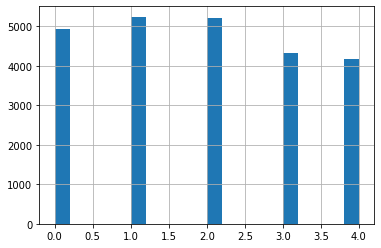

In [17]:
#########################################################################################################################################################################
#   This block of code is for processing the data
#########################################################################################################################################################################

train_row_increments = 5
test_row_increments = 30

#Initialize dataframes for storing the data and combine them to increase effectiveness of model
data1 = pd.read_csv('data_G01.csv')
data2 = pd.read_csv('data_G02.csv')
test_data = 'person_b_1'
data_combined = pd.concat([data1,data2],ignore_index=True)

#Process the data::Sample every 'train_row_increments' row (IMUs give data very frequently so the data is very similar)
# data = data_combined[1::train_row_increments]
data=data1
data_shuffled = data.sample(frac=1).reset_index(drop=True)
data_shuffled.Class.hist(bins=20) #displays the histogram based on posture
posture = data_shuffled.pop('Class')
data_shuffled = data_shuffled/180

#Split the data into 3 sets:: Training, Validation(used to check against overfitting, you dont want training accuracy to be over validation) 
val_ratio = 0.2     # Percentage of samples that should be held for validation set
test_ratio = 0.2    # Percentage of samples that should be held for test set
length = data.shape[0]
val_split = int(val_ratio * length)
test_split = int(val_split + (test_ratio * length))
x_val, x_test, x_train = np.split(data_shuffled, [val_split, test_split])
y_val, y_test, y_train = np.split(posture, [val_split, test_split])
assert(x_train.size + x_val.size + x_test.size) == data_shuffled.size

#Process the data for the testing data (This will be data from a new user that has never had their data in the training set)
test = pd.read_csv(test_data+'.csv')
test = test [1::test_row_increments]
test = test.sample(frac=1).reset_index(drop=True)
test_pop = test.pop('Class')
test = test / 180

#########################################################################################################################################################################

# **TRAINING**

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               1300      
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 255       
Total params: 6,605
Trainable params: 6,605
Non-trainable params: 0
___________________________________________________

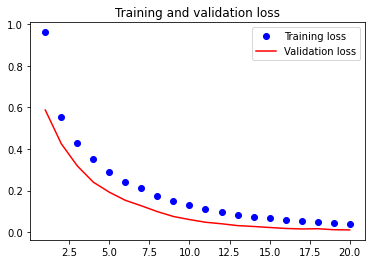

150/150 - 0s - loss: 0.0107 - accuracy: 0.9990

Test accuracy: 0.998953104019165
18/18 - 0s - loss: 2.3873 - accuracy: 0.3757

Test accuracy: 0.3756805956363678


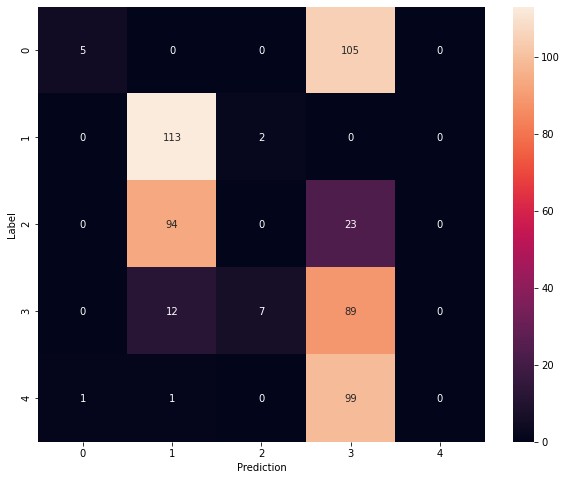

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 12)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 100)               1300      
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 53)                5353      
_________________________________________________________________
dropout_17 (Dropout)         (None, 53)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 5)                 270       
Total params: 6,923
Trainable params: 6,923
Non-trainable params: 0
___________________________________________________

KeyboardInterrupt: ignored

In [20]:
#########################################################################################################################################################################
#   This block of code is for trying different model configurations and seeing what works best
#########################################################################################################################################################################

#Affects the range of layers that the models will have and how much times we want to test that setup
i_range = 2
j_range = 2
k_range = 1

hidden_layer_1 = 100
hidden_layer_2 = 50
hidden_layer_1_interval = 10
hidden_layer_2_interval = 3

starting_num_epochs = 20

dropout_percent = 0.15
acceptable_accuracy = 0.9
max_extra_epoch = 0
#########################################################################################################################################################################

curr_run = 0
total_run = i_range*j_range*k_range 

#Test different configuration of models
test_history =[]
for i in range(0,i_range):
  for j in range(0,j_range):
    for k in range(0,k_range):
      curr_run = curr_run + 1

      #Creates the model structure and chooses the activation function for each layer
      model = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(12,1)),
          tf.keras.layers.Dense(hidden_layer_1+i*hidden_layer_1_interval, activation='relu'),  #hidden layers are generally: relu, sigmoide, tanh (Usually constant for all hidden layers)
          tf.keras.layers.Dropout(dropout_percent),
          tf.keras.layers.Dense(hidden_layer_2+j*hidden_layer_2_interval, activation='relu'),  
          tf.keras.layers.Dropout(dropout_percent),
          tf.keras.layers.Dense(5, activation='sigmoid'), #output layers are generally: linear, sigmoid, softmax
      ])
      model.summary()

      #Assign type of: optimizer, loss, and metric
      model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
      
      #Print out which loop we are undergoing
      print(curr_run)
      print("out of ")
      print(total_run)

      #Train the model with the training data and save the information in history
      history = model.fit(x_train,y_train,epochs=starting_num_epochs,validation_data=(x_val, y_val))

      # Plot the training history, you dont want the training loss to get lower than the validation loss (this indicates over-fitting)
      loss = history.history['loss']
      val_loss = history.history['val_loss']

      #Sometimes the model is not trained to an "acceptable" accuracy, this ofc relies on good data but we can keep training the model 
      curr_accuracy = history.history.get('accuracy')
      added_epoch = 0
      while curr_accuracy[len(curr_accuracy)-1] <acceptable_accuracy and added_epoch<max_extra_epoch:
        added_epoch = added_epoch +1
        history = model.fit(x_train,y_train,epochs=1,validation_data=(x_val, y_val))
        curr_accuracy = history.history.get('accuracy')
        loss.append(history.history['loss'][0])
        val_loss.append(history.history['val_loss'][0])
      total_epochs = starting_num_epochs + added_epoch
      epochs = np.arange(1,total_epochs+1)
      plt.plot(epochs, loss, 'bo', label='Training loss')
      plt.plot(epochs, val_loss, 'r', label='Validation loss')
      plt.title('Training and validation loss')
      plt.legend()
      plt.show()

      test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
      print('\nTest accuracy:', test_acc)

      #Test the model with unseen data and record the settings
      test_loss, test_acc = model.evaluate(test,  test_pop, verbose=2)
      print('\nTest accuracy:', test_acc)
      test_history.append([test_acc,hidden_layer_1+i*hidden_layer_1_interval,hidden_layer_2+j*hidden_layer_2_interval])

      #create a confusion matrix to see model performance
      predictions = model.predict(test)
      predictions = np.argmax(predictions,axis = 1)
      confusion_mtx = tf.math.confusion_matrix(
          test_pop, predictions, 5, weights=None, dtype=tf.dtypes.int32,
          name='PCD_Confusion_Matrix'
      )
      plt.figure(figsize=(10, 8))
      sns.heatmap(confusion_mtx,annot=True, fmt='g')
      plt.xlabel('Prediction')
      plt.ylabel('Label')
      plt.show()
#########################################################################################################################################################################

In [7]:
# d0 = []
# d0.append(len(data_shuffled[data_shuffled.Class==0]))
# d0.append(len(data_shuffled[data_shuffled.Class==1]))
# d0.append(len(data_shuffled[data_shuffled.Class==2]))
# d0.append(len(data_shuffled[data_shuffled.Class==3]))
# d0.append(len(data_shuffled[data_shuffled.Class==4]))
# per_class = min(d0)

AttributeError: ignored

# **CONVERT**

In [ ]:
#########################################################################################################################################################################
#   Optimize the model for size and convert to tflite model
#########################################################################################################################################################################

#Covert the model to a tflite model & optimize to reduce the size
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()
open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

#########################################################################################################################################################################

INFO:tensorflow:Assets written to: /tmp/tmpcv6mtfxp/assets


10192

In [ ]:
#########################################################################################################################################################################
#   Function to convert tflite file to C header file
#########################################################################################################################################################################

# Function: Convert some hex value into an array for C programming
def hex_to_c_array(hex_data, var_name):

  c_str = ''

  # Create header guard
  c_str += '#ifndef ' + var_name.upper() + '_H\n'
  c_str += '#define ' + var_name.upper() + '_H\n\n'

  # Add array length at top of file
  c_str += '\nunsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

  # Declare C variable
  c_str += 'unsigned char ' + var_name + '[] = {'
  hex_array = []
  for i, val in enumerate(hex_data) :

    # Construct string from hex
    hex_str = format(val, '#04x')

    # Add formatting so each line stays within 80 characters
    if (i + 1) < len(hex_data):
      hex_str += ','
    if (i + 1) % 12 == 0:
      hex_str += '\n '
    hex_array.append(hex_str)

  # Add closing brace
  c_str += '\n ' + format(' '.join(hex_array)) + '\n};\n\n'

  # Close out header guard
  c_str += '#endif //' + var_name.upper() + '_H'

  return c_str

#########################################################################################################################################################################

In [ ]:
#########################################################################################################################################################################
#   Convert to c-header file via function
#########################################################################################################################################################################

# Write TFLite model to a C source (or header) file
with open(c_model_name + '.h', 'w') as file:
  file.write(hex_to_c_array(tflite_model, c_model_name))

#########################################################################################################################################################################